In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/revenue_prediction.csv')

In [ ]:
df

,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,101,HungryHowie'sPizza,Yes,Mexican,Bengaluru,55,5.5,5953753
1,102,CharleysPhillySteaks,No,Varied Menu,Gurugram,72,6.8,7223131
2,103,Chuy's,Yes,Chicken,Pune,25,1.9,2555379
3,104,O'Charley's,Yes,Italian/Pizza,Mumbai,18,2.5,2175511
4,105,PolloTropical,Yes,Pizza,Noida,48,4.2,4816715
...,...,...,...,...,...,...,...,...
95,196,Wetzel'sPretzels,No,Italian/Pizza,Bengaluru,19,1.1,1270499
96,197,LaMadeleineCountryFrenchCafe,Yes,Varied Menu,Bengaluru,75,6.3,6412623
97,198,Giordano's,Yes,Varied Menu,Gurugram,77,6.2,6694797
98,199,IslandsFineBurgers&Drinks,Yes,Sports Bar,Pune,25,2.1,2344689


In [ ]:
df.isnull().sum()

Id              0
Name            0
Franchise       0
Category        0
City            0
No_Of_Item      0
Order_Placed    0
Revenue         0
dtype: int64

In [ ]:
df.shape

(100, 8)

In [ ]:
df.drop(columns=['Id','Name','Franchise','Category','City','No_Of_Item'],axis=1,inplace=True)

In [ ]:
df

,Order_Placed,Revenue
0,5.5,5953753
1,6.8,7223131
2,1.9,2555379
3,2.5,2175511
4,4.2,4816715
...,...,...
95,1.1,1270499
96,6.3,6412623
97,6.2,6694797
98,2.1,2344689


In [ ]:
x=df.iloc[:,:-1]
y=df[['Revenue']]

In [ ]:
x

,Order_Placed
0,5.5
1,6.8
2,1.9
3,2.5
4,4.2
...,...
95,1.1
96,6.3
97,6.2
98,2.1


In [ ]:
y

,Revenue
0,5953753
1,7223131
2,2555379
3,2175511
4,4816715
...,...
95,1270499
96,6412623
97,6694797
98,2344689


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=7)

In [ ]:
x_train

,Order_Placed
50,1.9
2,1.9
17,8.1
85,7.2
5,4.9
...,...
83,5.7
67,3.8
25,3.6
68,3.6


In [ ]:
print(len(x_train))
print(len(y_train))

80
80


In [ ]:
print(len(x_test))
print(len(y_test))

20
20


In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss

StandardScaler()

In [ ]:
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [ ]:
x_train

array([[-1.09582805e+00],
       [-1.09582805e+00],
       [ 1.86942406e+00],
       [ 1.43898424e+00],
       [ 3.38971361e-01],
       [ 9.60717772e-01],
       [-5.21908285e-01],
       [-6.17561579e-01],
       [ 4.34624655e-01],
       [ 1.00854442e+00],
       [-1.23930799e+00],
       [ 1.47664773e-01],
       [ 5.30277949e-01],
       [-6.17561579e-01],
       [-9.52348108e-01],
       [-7.61041520e-01],
       [-6.65388226e-01],
       [-1.52626787e+00],
       [-5.21908285e-01],
       [-1.87121756e-01],
       [ 4.34624655e-01],
       [ 9.98381256e-02],
       [-5.21908285e-01],
       [-3.78428344e-01],
       [ 9.98381256e-02],
       [-2.82775050e-01],
       [ 5.20114786e-02],
       [-1.47844123e+00],
       [ 1.95491420e-01],
       [-3.30601697e-01],
       [-4.26254991e-01],
       [-1.09582805e+00],
       [ 3.16074353e+00],
       [-1.39295109e-01],
       [ 1.24767765e+00],
       [-1.39295109e-01],
       [-1.19148134e+00],
       [ 7.69411184e-01],
       [-8.0

In [ ]:
len(x_train)

80

In [ ]:
len(y_train)

80

In [ ]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()
lin_model

LinearRegression()

In [ ]:
lin_model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=lin_model.predict(x_test)
y_pred

array([[2526896.53164083],
       [1898970.15902209],
       [3657164.00235458],
       [1647799.60997459],
       [9936427.72854206],
       [3154822.90425958],
       [3405993.45330708],
       [4285090.37497333],
       [3154822.90425958],
       [4033919.82592583],
       [5164187.29663958],
       [7675892.78711457],
       [1271043.78640334],
       [1271043.78640334],
       [1647799.60997459],
       [3782749.27687833],
       [5540943.12021083],
       [1396629.06092709],
       [6043284.21830582],
       [5792113.66925833]])

Text(0, 0.5, 'Revenue')

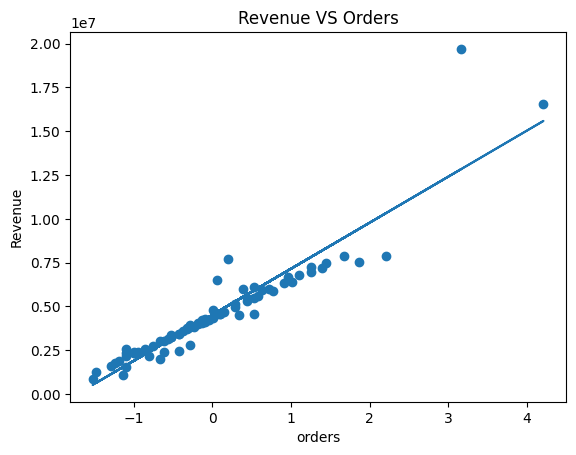

In [ ]:
plt.scatter(x_train,y_train)
plt.plot(x_train,lin_model.predict(x_train))
plt.title("Revenue VS Orders")
plt.xlabel('orders')
plt.ylabel('Revenue')

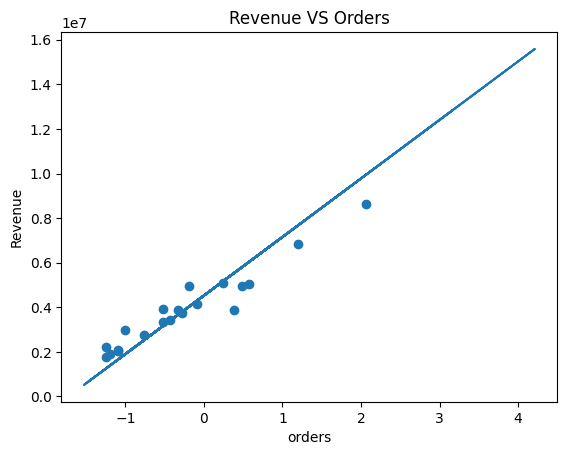

In [ ]:
plt.scatter(x_test,y_test)
plt.plot(x_train,lin_model.predict(x_train))
plt.title("Revenue VS Orders")
plt.xlabel('orders')
plt.ylabel('Revenue')
plt.show()

In [ ]:
data=pd.DataFrame(columns=['Actual','Predict'])

In [ ]:
y_test

,Revenue
37,2740687
26,2967425
78,3871344
91,2083447
49,8630682
15,3918918
93,3410878
71,4136425
86,3351383
22,4956086


In [ ]:
y_pred

array([[2526896.53164083],
       [1898970.15902209],
       [3657164.00235458],
       [1647799.60997459],
       [9936427.72854206],
       [3154822.90425958],
       [3405993.45330708],
       [4285090.37497333],
       [3154822.90425958],
       [4033919.82592583],
       [5164187.29663958],
       [7675892.78711457],
       [1271043.78640334],
       [1271043.78640334],
       [1647799.60997459],
       [3782749.27687833],
       [5540943.12021083],
       [1396629.06092709],
       [6043284.21830582],
       [5792113.66925833]])

In [ ]:
y_pred=pd.DataFrame(y_pred,columns=['Predict_values'])

In [ ]:
y_pred

,Predict_values
0,2.526897e+06
1,1.898970e+06
2,3.657164e+06
3,1.647800e+06
4,9.936428e+06
5,3.154823e+06
6,3.405993e+06
7,4.285090e+06
8,3.154823e+06
9,4.033920e+06


In [ ]:
data

,Actual,Predict


In [ ]:
data['Actual']=y_test.reset_index()['Revenue']
data['Predict']=y_pred.reset_index()['Predict_values']

In [ ]:
data

,Actual,Predict
0,2740687,2.526897e+06
1,2967425,1.898970e+06
2,3871344,3.657164e+06
3,2083447,1.647800e+06
4,8630682,9.936428e+06
5,3918918,3.154823e+06
6,3410878,3.405993e+06
7,4136425,4.285090e+06
8,3351383,3.154823e+06
9,4956086,4.033920e+06


In [ ]:
data['error']=data['Actual']-data['Predict']

In [ ]:
data

,Actual,Predict,error
0,2740687,2.526897e+06,2.137905e+05
1,2967425,1.898970e+06,1.068455e+06
2,3871344,3.657164e+06,2.141800e+05
3,2083447,1.647800e+06,4.356474e+05
4,8630682,9.936428e+06,-1.305746e+06
5,3918918,3.154823e+06,7.640951e+05
6,3410878,3.405993e+06,4.884547e+03
7,4136425,4.285090e+06,-1.486654e+05
8,3351383,3.154823e+06,1.965601e+05
9,4956086,4.033920e+06,9.221662e+05


In [ ]:
from sklearn import metrics
print('mean_absolute_error ',metrics.mean_absolute_error(y_test,y_pred))
print('mean_squared_error ',metrics.mean_squared_error(y_test,y_pred))
print('root_mean_squared_error ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

mean_absolute_error  603519.5918735169
mean_squared_error  573363902197.1437
root_mean_squared_error  757207.9649588637


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_pred,y_test)

0.8862967399483048